# Mount and Import

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/aust_academia/Pattern Recognition Lab (CSE4214)/Project/dataset/Book_RS_Dataset_v5'

/content/gdrive/MyDrive/Colab Notebooks/aust_academia/Pattern Recognition Lab (CSE4214)/Project/dataset/Book_RS_Dataset_v5


In [ ]:
!ls

books.csv      genres.csv      ratings.csv	 tags.csv
book_tags.csv  maxRatings.csv  stringedTags.csv  to_read.csv


In [ ]:
import pandas as pd
import numpy as np

# Read CSV

In [ ]:
stringedTags = pd.read_csv('stringedTags.csv',index_col=0)
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

In [ ]:
stringedTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9996
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   goodreads_book_id  9997 non-null   int64 
 1   tag_name           9997 non-null   object
 2   authors            9997 non-null   object
 3   title              9997 non-null   object
 4   all_tags           9997 non-null   object
dtypes: int64(1), object(4)
memory usage: 468.6+ KB


# rating.csv - all books

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [ ]:
# ratings.groupby('book_id')['user_id'].count().head(20)

In [ ]:
stringedTags

,goodreads_book_id,tag_name,authors,title,all_tags
0,1,fantasy young-adult fiction children paranorma...,j.k.rowling marygrandpré,Harry Potter and the Half-Blood Prince (Harry ...,fantasy young-adult fiction children paranorma...
1,2,fantasy young-adult fiction children paranorma...,j.k.rowling marygrandpré,Harry Potter and the Order of the Phoenix (Har...,fantasy young-adult fiction children paranorma...
2,3,fantasy young-adult fiction children paranorma...,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...,fantasy young-adult fiction children paranorma...
3,5,fantasy young-adult fiction children paranorma...,j.k.rowling marygrandpré rufusbeck,Harry Potter and the Prisoner of Azkaban (Harr...,fantasy young-adult fiction children paranorma...
4,6,fantasy young-adult fiction children paranorma...,j.k.rowling marygrandpré,Harry Potter and the Goblet of Fire (Harry Pot...,fantasy young-adult fiction children paranorma...
...,...,...,...,...,...
9992,31538647,fantasy young-adult fiction children paranormal,j.k.rowling,Hogwarts: An Incomplete and Unreliable Guide (...,fantasy young-adult fiction children paranorma...
9993,31845516,fiction adult non-fiction biography,glennondoylemelton,Love Warrior,fiction adult non-fiction biography glennondoy...
9994,32075671,young-adult fiction romance crime,angiethomas,The Hate U Give,young-adult fiction romance crime angiethomas
9995,32848471,fiction romance adult,vikeeland,Egomaniac,fiction romance adult vikeeland


# G

In [ ]:
g = 5
index = np.where(stringedTags['goodreads_book_id'] == g)[0][0]
read_book = stringedTags.iloc[[index]]
read_book

,goodreads_book_id,tag_name,authors,title,all_tags
3,5,fantasy young-adult fiction children paranorma...,j.k.rowling marygrandpré rufusbeck,Harry Potter and the Prisoner of Azkaban (Harr...,fantasy young-adult fiction children paranorma...


In [ ]:
read_book = stringedTags.loc[stringedTags['goodreads_book_id'] == 3]
read_book

,goodreads_book_id,tag_name,authors,title,all_tags
2,3,fantasy young-adult fiction children paranorma...,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...,fantasy young-adult fiction children paranorma...


# Functions

## getAllUsers

In [ ]:
def getAllUsers(bookID):
    same_book_id = ratings.loc[ratings['book_id'] == bookID]
    all_users = same_book_id.user_id
    all_users_numpy = all_users.to_numpy()

    return all_users_numpy

## getAcc

In [ ]:
def getAcc(preds,actual) :
    preds  = preds.astype(np.int32)
    actual = actual.astype(np.int32)

    common_len = len(np.intersect1d(preds, actual))
    pred_len = len(preds)

    accuracy = (common_len / pred_len) * 100
    accuracy = round(accuracy,4)


    return accuracy

## allUsers_accuracy

In [ ]:
def allUsers_accuracy (all_users,predicted_booksID) :
    acc_list = []

    for user in all_users:
        actual_booksID_of_oneUser = ratings.loc[ratings['user_id'] == user].book_id.to_numpy()

        acc = getAcc(preds = predicted_booksID,
                    actual = actual_booksID_of_oneUser)
        
        acc_list.append(acc)

        # print('user ID:',user)
        # print(actual_booksID_of_oneUser)
        # print()

    acc_list = np.array(acc_list, dtype=np.float32)

    # return acc_list

    accuracy = sum(acc_list) / len(acc_list)
    accuracy = round(accuracy,4)

    return accuracy

# Content based RS with TfidfVectorizer

In [ ]:
# ami add korsi... kintu moontahar add kora lagbe na


# for tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_rev = tfidf_vectorizer.fit_transform((stringedTags['all_tags']))
tfidf_rev


# for count
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_rev = count_vectorizer.fit_transform((stringedTags['all_tags']))
count_rev

<9997x6209 sparse matrix of type '<class 'numpy.int64'>'
	with 65306 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
book_tfidf = tfidf_vectorizer.transform(read_book['all_tags'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(book_tfidf, x), tfidf_rev)
output = list(cos_similarity_tfidf)

# Content based RS with CountVectorizer

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
book_count = count_vectorizer.transform(read_book['all_tags'])
cos_similarity_countv = map(lambda x: cosine_similarity(book_count, x), count_rev)
output2 = list(cos_similarity_countv)

#Top recommendations

In [ ]:
#This function takes input as top= how many top recommendation we want to see,
# ds=dataframe(here, stringedTags) and scores= cosine similarity score of other bookes with the given id's book
# and give output -->recommendation(goodreads book id, author names, title and similarity score with the given id) 

def get_recommendation(top, ds, scores):
  recommendation = pd.DataFrame(columns = ['goodreads_book_id', 'authors', 'title', 'score'])
  count = 0
  for i in top:
    if stringedTags.iloc[i, 0]<=10000 and scores[count]>=0.5 :
      recommendation.at[count, 'goodreads_book_id'] = stringedTags.iloc[i, 0]
      recommendation.at[count, 'authors'] = stringedTags.iloc[i, 2]
      recommendation.at[count, 'title'] = stringedTags.iloc[i, 3]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [ ]:
# for tfidf
top = sorted(range(len(output)), key=lambda i: output[i], reverse=True)
list_scores = [output[i][0][0] for i in top]

comparison=get_recommendation(top, stringedTags, list_scores)
# get_recommendation(top, stringedTags, list_scores)

In [ ]:
# for count
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)
list_scores = [output2[i][0][0] for i in top]
comparison_countVec = get_recommendation(top, stringedTags, list_scores)

# comparison_countVec

#TFIDF For evaluation (User Preference)

In [ ]:
#amader model ei ei boi user k suggest korse

# comparison 

In [ ]:
tfidf_predicted_booksID = comparison.goodreads_book_id.to_numpy()

In [ ]:
tfidf_predicted_booksID

array([3, 6, 1, 2, 8, 5, 10, 2002, 9475, 8948, 8949, 8951, 8952, 8960,
       8962, 8963, 8965], dtype=object)

In [ ]:
g

5

In [ ]:
# books.csv te khujbo oi user kon kon boi porse
# getAllUsers(g)

In [ ]:
len(getAllUsers(g))

100

In [ ]:
all_users = getAllUsers(g)

tfidf_acc = allUsers_accuracy(all_users,tfidf_predicted_booksID)

# Count Vec Evaluation

In [ ]:
# comparison_countVec

In [ ]:
countVec_predicted_booksID = comparison_countVec.goodreads_book_id.to_numpy()
countVec_predicted_booksID

array([3, 6, 1, 2, 5, 8, 10, 2002, 9475, 6294, 8948, 8949, 8951, 8952,
       8960, 8962, 8963, 8965, 8966, 8967, 8968, 6554, 3467, 3304, 8957,
       5326, 903, 902, 6327, 2998, 827, 2839, 3636, 3980, 7996, 6572,
       7980, 7999, 30, 2744, 5907, 7967, 9532, 4516, 7979, 7987, 7998,
       9531, 1852, 2142, 3682, 2879, 3464, 3685, 4835, 6334, 6628, 6671,
       6687, 7677, 7981, 7983, 7993, 8088, 365, 378, 4407, 5091, 5094,
       5417, 5659, 6670, 6689, 6690, 6693, 8073, 9822, 2978, 7624, 7733,
       7973, 3008, 5297, 5338, 9014, 8852, 8908, 50, 4538, 5367, 8953, 11,
       13, 33, 34, 360, 2442, 2880, 3384, 4214, 4381, 4978, 5093, 5129,
       5575, 6328, 6694, 7770, 7779, 8492, 8647, 8648, 8694, 8695, 9534,
       2932, 8089, 4588, 295, 7788, 8732, 667, 870, 1618, 2915, 3462,
       3463, 4271, 5096, 5413, 6419, 6420, 7911, 8087, 8698, 9943, 7613,
       7968, 3974, 357, 830, 4031, 5038, 5159, 5452, 5454, 6310, 6819,
       7081, 7670, 7672, 7784, 8650, 9998, 6159, 6678, 7780, 193

In [ ]:
len(countVec_predicted_booksID)

812

In [ ]:
g

5

In [ ]:
all_users = getAllUsers(g)

countVec_acc = allUsers_accuracy(all_users,countVec_predicted_booksID)

# Accuracy

In [ ]:
tfidf_acc

23.6471

In [ ]:
countVec_acc

2.7204

| G   |      tfidf      |  count vec |
|----------|:-------------:|------:|
| 3 |  22.7059 | 2.6342 |
| 5 |  23.6471 | 2.7204 |
| 8 |  23.0588 | 2.6441 |



## graph

In [ ]:
comparison.score[1:11]

1            1
2            1
3     0.987886
4     0.987886
5     0.987886
6     0.985589
7     0.980338
8     0.778616
9     0.742696
10    0.742696
Name: score, dtype: object

In [ ]:
comparison_countVec.score[1:11]

1            1
2            1
3     0.948683
4     0.948683
5     0.948683
6     0.948683
7     0.948683
8     0.942809
9     0.942809
10    0.942809
Name: score, dtype: object

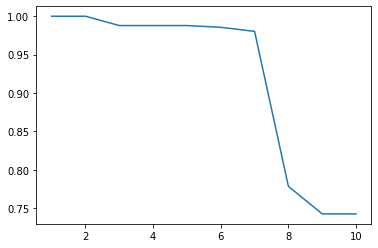

In [ ]:
comparison.score[1:11].plot.line()

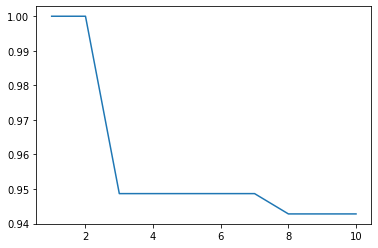

In [ ]:
comparison_countVec.score[1:11].plot.line()

In [ ]:
df_plot = pd.DataFrame({'TF-IDF':comparison.score[1:11], 'Count Vec': comparison_countVec.score[1:11]})

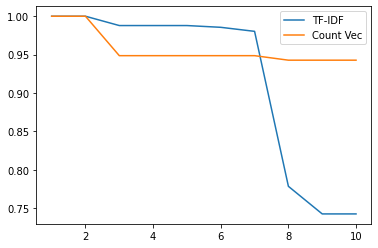

In [ ]:
df_plot.plot.line()

## Table

In [ ]:
comparison

In [ ]:
comparison.loc[comparison['title'] != read_book['title'].to_numpy()[0]]

In [ ]:
tfidf_titles =  comparison.loc[comparison['title'] != read_book['title'].to_numpy()[0]].title[:10]
tfidf_titles

In [ ]:
countVec_titles = comparison_countVec.loc[comparison_countVec['title'] != read_book['title'].to_numpy()[0]].title[:10]
countVec_titles

In [ ]:
df_recommandation = pd.DataFrame({'TF-IDF': tfidf_titles, 'Count Vec': countVec_titles})

In [ ]:
df_recommandation

,TF-IDF,Count Vec
1,Harry Potter and the Goblet of Fire (Harry Pot...,Harry Potter and the Goblet of Fire (Harry Pot...
2,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince (Harry ...
3,Harry Potter and the Order of the Phoenix (Har...,Harry Potter and the Order of the Phoenix (Har...
4,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",Harry Potter and the Prisoner of Azkaban (Harr...
5,Harry Potter and the Prisoner of Azkaban (Harr...,"Harry Potter Boxed Set, Books 1-5 (Harry Potte..."
6,"Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Collection (Harry Potter, #1-6)"
7,Harry Potter Schoolbooks Box Set: Two Classic ...,Harry Potter Schoolbooks Box Set: Two Classic ...
8,Midnight for Charlie Bone (The Children of the...,Midnight for Charlie Bone (The Children of the...
9,"Sons of Destiny (Cirque Du Freak, #12)","Howl's Moving Castle (Howl's Moving Castle, #1)"
10,"Lord of the Shadows (Cirque Du Freak, #11)","Sons of Destiny (Cirque Du Freak, #12)"
